<a href="https://colab.research.google.com/github/kpkaranpatil600/INFO6205-Program-Structure-and-Algorithms/blob/main/DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graph data structure
## Copyright: Jagadeesh Vasudevamurthy
## filename:graph.ipynb¶

# All import here

In [15]:
import sys # For getting Python Version
import os
import enum # For enum
from graphviz import Source
import graphviz
import networkx as nx
print("Version of Python I am using is", sys.version)
print("Version of networkx I am using is", nx.__version__)

Version of Python I am using is 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Version of networkx I am using is 3.1


# Graph input and output directory setup
# YOU MUST CHANGE 2 lines below

In [16]:
inputFileBase = "/graphdata/"
outputFileBase = "/dot/"

In [17]:
def read_dot_file(f:'string')->'dot_graph':
    filename = outputFileBase + f + ".dot"
    print(filename)
    with open(filename) as f1:
        dot_graph = f1.read()
    print(dot_graph)
    return(dot_graph)

# Write Graph as a dot file

# YOU WRITE CODE HERE

In [18]:
############################################################
# GraphDot.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType


class GraphDot:
    def __init__(self, g, f):
        self._g = g  # Handle to graph
        self._f = f  # File where you write graph in dot format
        self._of = open(self._f, "w")
        self._write_dot()
        self._of.close()

    ############################################################
    # Write code: _write_dot
    # Use as many private functions and prvate data you want
    ###########################################################
    def _write_dot(self):
        self._of.write("## Karan Patil ####\n")
        self._of.write("digraph g {\n")
        if not self._g.is_directed_graph():
            self._of.write("edge [dir=none, color=red]\n")
        else:
            self._of.write("edge [color=red]\n")


        visited_edges = []


        for node in self._g.list_of_nodes():
            fanouts = self._g.fanouts_of_node(node)

            for fanout in fanouts:
                edge = str(node) + " " + str(fanout)
                reverse_edge = str(fanout) + " " + str(node) #to reverse the edge to find if it is present in the list

                if edge in visited_edges or reverse_edge in visited_edges:
                    continue
                visited_edges.append(edge)

                edge_str = str(node) + " "


                if self._g.is_weighted_graph():
                    weight = self._g.get_edge_weight(node, fanout)
                    edge_str += "-> "
                    edge_str += str(fanout) + " [label = " + str(weight) + "]\n"
                else:
                    edge_str += "-> "
                    edge_str += str(fanout) + "\n"

                self._of.write(edge_str)

        self._of.write("}\n")



# DFS USING TIME STAMP

In [19]:
############################################################
# GraphDfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *
#from Data import *  ##User UDT

############################################################
# Depth First serach using TimeStamp
###########################################################
class GraphDfsUsingTimeStamp:
    def __init__(
        self,
        g: "graph",
        gname: "string",
        dfs_order: "list of Nodes",
        has_loop: "list of size 1",
        work: "list of size 1",
        dfs_traversal_output_file,
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._f = gname
        self._dfs_order = dfs_order
        self._has_loop = has_loop
        self._has_loop[0] = False
        self._work = work
        self._work[0] = 0
        self._dfs_traversal_output_file = dfs_traversal_output_file

        ##YOU CAN has any number of private varibles and funcions

        self._dfs()
        self._write_dot()

    ##########################################################
    # Write dot file of DFS traversal
    ##########################################################
    def _write_dot(self):
        with open(self._dfs_traversal_output_file, "w") as f:
            f.write("digraph g {\n")
            f.write('label = "[{} ] {}"\n'.format(" ".join(str(n) for n in self._dfs_order), "LOOP" if self._has_loop[0] else "NOLOOP"))
            time_values = {}

            def _dfs_visit_time(node, parent, visited_nodes, time, call_stack_visited):
                visited_nodes.add(node)
                call_stack_visited.add(node)
                time += 1
                time_values[node] = (time, None)

                for neighbor in self._g.fanouts_of_node(node):
                    if neighbor != parent:
                        if neighbor not in visited_nodes:
                            time = _dfs_visit_time(neighbor, node, visited_nodes, time, call_stack_visited)

                time += 1
                time_values[node] = (time_values[node][0], time)

                call_stack_visited.remove(node)
                return time

            visited_nodes = set()
            time = 0
            for node in self._g.list_of_nodes():
                if node not in visited_nodes:
                    time = _dfs_visit_time(node, None, visited_nodes, time, set())



            for node in self._dfs_order:
                time_in_stack, time_out_stack = time_values[node]
                label = "<{}<BR /><FONT POINT-SIZE='10'>{}/{}</FONT>>".format(node, time_in_stack, time_out_stack)
                f.write("{}[label = {}]\n".format(node, label))

            if not self._g.is_directed_graph():
                f.write("edge [dir=none, color=red]\n")
            else:
                f.write("edge [color=red]\n")

            visited_edges = []

            for node in self._g.list_of_nodes():
                fanouts = self._g.fanouts_of_node(node)

                for fanout in fanouts:
                    edge = str(node) + " " + str(fanout)
                    reverse_edge = str(fanout) + " " + str(node) #to reverse the edge to find if it is present in the list

                    if edge in visited_edges or reverse_edge in visited_edges:
                        continue
                    visited_edges.append(edge)

                    edge_str = str(node) + " "


                    if self._g.is_weighted_graph():
                        weight = self._g.get_edge_weight(node, fanout)
                        edge_str += "-> "
                        edge_str += str(fanout) + " [label = " + str(weight) + "]\n"
                    else:
                        edge_str += "-> "
                        edge_str += str(fanout) + "\n"

                    f.write(edge_str)

            f.write("}\n")



    ##########################################################
    # TIME: THETA(V + E)
    # SPACE: O(Largest path) = O(V)
    ##########################################################
    def _dfs(self):
        def _dfs_visit(node, parent, visited_nodes, time, call_stack_visited):
              self._work[0] += 1

              visited_nodes.add(node)
              call_stack_visited.add(node)
              time += 1
              time_in_stack = time
              for neighbor in self._g.fanouts_of_node(node):
                  if neighbor != parent:
                      if neighbor in call_stack_visited:
                          self._has_loop[0] = True
                      if neighbor not in visited_nodes:
                          time = _dfs_visit(neighbor, node, visited_nodes, time, call_stack_visited)

              time += 1
              time_out_stack = time
              self._dfs_order.append(node)

              if time_out_stack - time_in_stack == 1 and not self._has_loop[0]:
                  self._has_loop[0] = False

              call_stack_visited.remove(node)
              return time

        visited_nodes = set()
        time = 0


        for node in self._g.list_of_nodes():
            if node not in visited_nodes:
                time = _dfs_visit(node, None, visited_nodes, time, set())

        self._dfs_order.reverse()


## NOTHING CAN BE CHANGED BELOW

# Graph Data

In [20]:
###########################################################
# Data.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################


class Data:
    def __init__(self, n: "string"):
        self._name = n  ### _name is used as key for this object
        self.age = 100  ## To show you can have anything,

    def __hash__(self):
        t = hash(self._name)
        return t

    def __eq__(self, other: "Node") -> "bool":
        if not isinstance(other, type(self)):
            assert False
        return self._name == other._name

    def __str__(self):
        return self._name

    def get_key(self) -> "string":
        return self._name


## Graph Types

In [21]:
class GraphType(enum.Enum):
    NONE = 0
    UNDIRECTED = 1
    DIRECTED = 2
    WEIGHTED_UNDIRECTED = 3
    WEIGHTED_DIRECTED  = 4

## Graph class

In [22]:
############################################################
# Graph.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 20203
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
'''
import networkx as nx  ##network nx graph
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Data import *  ##User UDT
from GraphBuilder import *
from GraphDot import *
from GraphShow import *
from GraphDfs import *
'''

class Graph:
    ##GRAPH DATA STRUCTURE
    def __init__(self):
        self._g = None  # networkx graph

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def is_directed_graph(self) -> "bool":
        if self._g.is_directed():
            return True
        return False

    def is_undirected_graph(self) -> "bool":
        return not (self._g.is_directed_graph())

    def is_weighted_graph(self) -> "bool":
        return nx.is_weighted(self._g)

    def get_graph_type(self) -> "GraphType":
        weighted = self.is_weighted_graph()
        if self.is_directed_graph():
            if weighted:
                return GraphType.WEIGHTED_DIRECTED
            else:
                return GraphType.DIRECTED
        if weighted:
            return GraphType.WEIGHTED_UNDIRECTED
        return GraphType.UNDIRECTED

    def get_graph_type_as_string(self) -> "string":
        t = self.get_graph_type()
        if t == GraphType.UNDIRECTED:
            return "UNDIRECTED GRAPH"
        if t == GraphType.DIRECTED:
            return "DIRECTED GRAPH"
        if t == GraphType.WEIGHTED_UNDIRECTED:
            return "WEIGHTED_UNDIRECTED GRAPH"
        if t == GraphType.WEIGHTED_DIRECTED:
            return "WEIGHTED_DIRECTED GRAPH"
        return "NONE"

    def get_node_name(self, n: "node") -> "string":
        return str(n)

    def get_edge_weight(self, f: "node1", t: "node2") -> "weight":
        w = 0
        if self.is_weighted_graph():
            w = self._g.edges[f, t]["weight"]
        return w

    def get_numV(self) -> "int":
        l = self._g.number_of_nodes()
        return l

    def get_numE(self) -> "int":
        l = self._g.number_of_edges()
        return l

    def fanouts_of_node(self, n: "node") -> "list of nodes":
        if self.is_directed_graph():
            a = list(self._g.successors(n))
        else:
            a = self._g.adj[n]
        return a

    def fanins_of_node(self, n: "node") -> "list of nodes":
        assert self.is_directed_graph()
        a = list(self._g.predecessors(n))
        return a

    def num_fanout(self, n: "node") -> "int":
        a = self.fanouts_of_node(n)
        s = len(a)
        return s

    def num_fanin(self, n: "node") -> "int":
        a = self.fanins_of_node(n)
        s = len(a)
        return s

    def list_of_nodes(self) -> "list of nodes":
        l = list(self._g.nodes())
        return l

    def dump(self, name):
        print("------------", name, "------------ ")
        s = self.get_graph_type_as_string()
        print(s)
        print("Num Vertices =", self.get_numV())
        print("Num Edges    =", self.get_numE())
        nodes = self.list_of_nodes()
        for n in nodes:
            print(n, "Fanouts: ", end="")
            fanouts_of_n = self.fanouts_of_node(n)
            f = len(fanouts_of_n)
            if f == 0:
                print("NONE")
            else:
                j = 0
                for nf in fanouts_of_n:
                    if j < f - 1:
                        print(nf, ",", sep="", end="")
                    else:
                        print(nf)
                    j = j + 1
            if self.is_directed_graph():
                print(n, "Fanins: ", end="")
                fanins_of_n = self.fanins_of_node(n)
                f = len(fanins_of_n)
                if f == 0:
                    print("NONE")
                else:
                    j = 0
                    for nf in fanins_of_n:
                        if j < f - 1:
                            print(nf, ",", sep="", end="")
                        else:
                            print(nf)
                        j = j + 1

    ##########################################################
    # Nothing can be changed
    # TIME: THETA(V + E)
    # SPACE: THETA(V)
    ##########################################################
    def assert_dfs_passed(self, has_loop: "bool", dfs_order: "list of nodes"):
        t = self.get_graph_type()
        if (t == GraphType.UNDIRECTED) or (t == GraphType.WEIGHTED_UNDIRECTED):
            return
        if has_loop == False:
            set_of_visited_nodes = set()
            for n in dfs_order:
                ## Go on fanins of node
                fanins_of_n = self.fanins_of_node(n)
                for nf in fanins_of_n:
                    must_be_there = nf in set_of_visited_nodes  # find in THETA(1)
                    assert must_be_there
                set_of_visited_nodes.add(n)  # add in THETA(1)
            # All nodes must be visited
            assert len(set_of_visited_nodes) == self.get_numV()
            print("DFS ASSERT PASSED")

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################

    ############################################################
    ## All the routines written by students
    ##########################################################
    def build_graph(self, f: "file name", d: "bool"):
        b = GraphBuilder(self,f, d) # d True means directed. False means undirected
        self._g = b._build_graph()

    def write_dot(self, f):
        b = GraphDot(self, f)

    def show_dot_file(self, filename: "string"):
        with open(filename) as f:
            dot_graph = f.read()
        return dot_graph

    def dfs_using_time_stamp(
        self,
        gname: "string",
        dfs_order: "list of nodes",
        has_loop: "List of size 1 Boolean",
        work: "list of size 1",
        dfs_dot_output_file: "Traversal file name",
    ):

        b = GraphDfsUsingTimeStamp(
            self, gname, dfs_order, has_loop, work, dfs_dot_output_file
        )


## Graph Builder class

In [23]:
############################################################
# GraphBuilder.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType


class GraphBuilder:
    def __init__(self,g:'graph', f: "string", d: "bool"):
        self._g = g ; #graph object
        self._f = f  # File from which you are building graph
        self._directed = d  # true means directed graph
        self._g._g = self._build_graph()

    ############################################################
    # Write code: build_graph
    # Use as many private functions and prvate data you want
    ###########################################################
    def _build_graph(self) -> "graph":
        notReadline = 0
        readline = 0
        if self._directed:
            g = nx.DiGraph()
        else:
            g = nx.Graph()
        with open(self._f, "r") as file:
            data = file.readlines()
            for aline in data:
                token = aline.split()
                size = len(token)
                if (size < 2) or (size > 3):
                    notReadline = notReadline + 1
                    print("NOT READ LINE", aline)
                    continue
                readline = readline + 1
                if size == 3:
                    #  weighted graph
                    #   Hard to debug
                    #   g.add_edge('A', 'B', weight=3)
                    g.add_edge(token[0], token[1], weight=token[2])
                else:
                    g.add_edge(token[0], token[1])
        return g


# DFS TESTER

In [24]:
############################################################
# GraphDfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
'''
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from Data import *  ##User UDT
from GraphGlobal import *
'''

class GraphDfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        # self._test_one()
        self._test()

    def _test1(self, gname: "graphname", directed: "bool", expected_has_loop: "Bool"):
        full_name = inputFileBase + gname + ".txt"

        print("Building graph", full_name)
        g = Graph()
        g.build_graph(full_name,directed)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)

        dfs_order = []  # Caller will Fill. List of Nodes
        has_loop = [False]  # List of size 1
        work = [0]  # List of size 1
        dfs_dot_output_file = outputFileBase + gname + "dfs.dot"
        g.dfs_using_time_stamp(gname, dfs_order, has_loop, work, dfs_dot_output_file)

        print("DFS traversal is in")
        print(dfs_dot_output_file)

        print("DFS ORDER: ", end=" ")
        for node in dfs_order:
            p1 = g.get_node_name(node)
            print(p1, end=" ")
        print()

        if has_loop[0]:
            print("LOOP")
        else:
            print("NOLOOP")
        print("Work Done", work[0])
        assert has_loop[0] == expected_has_loop
        g.assert_dfs_passed(has_loop[0],dfs_order)

    def _test_one(self):
        g = [
            ["1", GraphType.UNDIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])

    def _test(self):
        g = [
            ["u1", False, False],
            ["1", False, False],
            ["udf1", True, True],
            ["2", True, False],
            ["3", True, True],
            ["cat", True, False],
            ["7", True, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])


# Graph Representation Tester

In [25]:
############################################################
# GraphRepresentationTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *


class GraphRepresentationTest:
    def __init__(self):
        self._test()

    def _u1(self):
        name = "13"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, False)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 7
        assert g.get_numE() == 12

    def _uw1(self):
        name = "14"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, False)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 10

    def _d1(self):
        name = "15"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 6

    def _dw1(self):
        name = "16"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 5
        assert g.get_numE() == 6

    def _DAG(self):
        name = "cat"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 7

    def _loop(self):
        name = "loopparallel"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        #assert g.get_numV() == 6
        #assert g.get_numE() == 7

    def _test(self):
        self._u1()
        self._uw1()
        self._d1()
        self._dw1()
        self._DAG()
        self._loop()


# Graph tester

In [26]:
############################################################
# GraphTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
'''
import sys  # For getting Python Version
import enum
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from GraphRepresentationTest import *
from GraphDfsTest import *
'''

class GraphTest:
    def __init__(self):
        pass

    def RepresentationTest(self):
        t = GraphRepresentationTest()

    def DFS(self):
        t = GraphDfsTest()


# Main

In [27]:
############################################################
# main
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphTest()
    a = [0, 1]
    if a[0]:
        t.RepresentationTest()
        print("test_graph_representation Passed")
    if a[1]:
        t.DFS()
        print("DFS Passed")

# call Main

In [28]:
############################################################
# start up
###########################################################
if (__name__  == '__main__'):
      main()

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Building graph /graphdata/u1.txt
DFS traversal is in
/dot/u1dfs.dot
DFS ORDER:  0 1 
NOLOOP
Work Done 2
Building graph /graphdata/1.txt
DFS traversal is in
/dot/1dfs.dot
DFS ORDER:  1 3 5 4 2 
NOLOOP
Work Done 5
Building graph /graphdata/udf1.txt
NOT READ LINE 

NOT READ LINE 

DFS traversal is in
/dot/udf1dfs.dot
DFS ORDER:  0 1 3 5 4 2 
LOOP
Work Done 6
Building graph /graphdata/2.txt
DFS traversal is in
/dot/2dfs.dot
DFS ORDER:  1 3 2 4 5 
NOLOOP
Work Done 5
DFS ASSERT PASSED
Building graph /graphdata/3.txt
DFS traversal is in
/dot/3dfs.dot
DFS ORDER:  0 1 3 4 2 
LOOP
Work Done 5
Building graph /graphdata/cat.txt
NOT READ LINE 

NOT READ LINE 

DFS traversal is in
/dot/catdfs.dot
DFS ORDER:  Cab Cat Mat Car Bar Bat 
NOLOOP
Work Done 6
DFS ASSERT PASSED
Building graph /graphdata/7.txt
NOT READ LINE  
NOT READ LINE  
DFS traversal is in
/dot/7dfs.dot
DFS ORDER:  0 3 1 2 4 5 6 
NOLOOP
Work Done 7
DFS ASSERT PASSED
DFS Passed


# DFS TRAVERSAL

/dot/u1dfs.dot
digraph g {
label = "[0 1 ] NOLOOP"
0[label = <0<BR /><FONT POINT-SIZE='10'>1/4</FONT>>]
1[label = <1<BR /><FONT POINT-SIZE='10'>2/3</FONT>>]
edge [dir=none, color=red]
0 -> 1
}



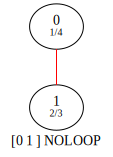

In [29]:
Source(read_dot_file("u1dfs"))

/dot/1dfs.dot
digraph g {
label = "[1 3 5 4 2 ] NOLOOP"
1[label = <1<BR /><FONT POINT-SIZE='10'>1/10</FONT>>]
3[label = <3<BR /><FONT POINT-SIZE='10'>4/9</FONT>>]
5[label = <5<BR /><FONT POINT-SIZE='10'>7/8</FONT>>]
4[label = <4<BR /><FONT POINT-SIZE='10'>5/6</FONT>>]
2[label = <2<BR /><FONT POINT-SIZE='10'>2/3</FONT>>]
edge [dir=none, color=red]
1 -> 2
1 -> 3
3 -> 4
3 -> 5
}



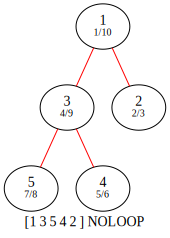

In [30]:
Source(read_dot_file("1dfs"))

/dot/udf1dfs.dot
digraph g {
label = "[0 1 3 5 4 2 ] LOOP"
0[label = <0<BR /><FONT POINT-SIZE='10'>1/12</FONT>>]
1[label = <1<BR /><FONT POINT-SIZE='10'>2/11</FONT>>]
3[label = <3<BR /><FONT POINT-SIZE='10'>3/10</FONT>>]
5[label = <5<BR /><FONT POINT-SIZE='10'>4/9</FONT>>]
4[label = <4<BR /><FONT POINT-SIZE='10'>5/8</FONT>>]
2[label = <2<BR /><FONT POINT-SIZE='10'>6/7</FONT>>]
edge [color=red]
0 -> 1
1 -> 3
3 -> 5
3 -> 2
5 -> 4
4 -> 2
2 -> 0
}



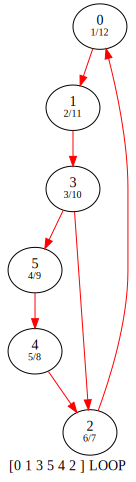

In [31]:
Source(read_dot_file("udf1dfs"))

/dot/2dfs.dot
digraph g {
label = "[1 3 2 4 5 ] NOLOOP"
1[label = <1<BR /><FONT POINT-SIZE='10'>1/10</FONT>>]
3[label = <3<BR /><FONT POINT-SIZE='10'>8/9</FONT>>]
2[label = <2<BR /><FONT POINT-SIZE='10'>2/7</FONT>>]
4[label = <4<BR /><FONT POINT-SIZE='10'>3/6</FONT>>]
5[label = <5<BR /><FONT POINT-SIZE='10'>4/5</FONT>>]
edge [color=red]
1 -> 2
1 -> 3
2 -> 4
3 -> 4
4 -> 5
}



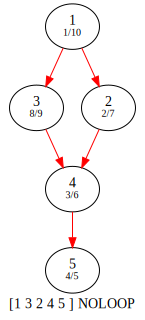

In [32]:
Source(read_dot_file("2dfs"))

/dot/3dfs.dot
digraph g {
label = "[0 1 3 4 2 ] LOOP"
0[label = <0<BR /><FONT POINT-SIZE='10'>1/10</FONT>>]
1[label = <1<BR /><FONT POINT-SIZE='10'>2/9</FONT>>]
3[label = <3<BR /><FONT POINT-SIZE='10'>3/8</FONT>>]
4[label = <4<BR /><FONT POINT-SIZE='10'>4/7</FONT>>]
2[label = <2<BR /><FONT POINT-SIZE='10'>5/6</FONT>>]
edge [color=red]
0 -> 1
0 -> 2
1 -> 3
2 -> 3
3 -> 4
4 -> 2
}



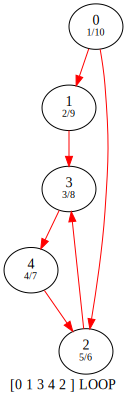

In [33]:
Source(read_dot_file("3dfs"))

/dot/catdfs.dot
digraph g {
label = "[Cab Cat Mat Car Bar Bat ] NOLOOP"
Cab[label = <Cab<BR /><FONT POINT-SIZE='10'>5/12</FONT>>]
Cat[label = <Cat<BR /><FONT POINT-SIZE='10'>8/11</FONT>>]
Mat[label = <Mat<BR /><FONT POINT-SIZE='10'>9/10</FONT>>]
Car[label = <Car<BR /><FONT POINT-SIZE='10'>6/7</FONT>>]
Bar[label = <Bar<BR /><FONT POINT-SIZE='10'>1/4</FONT>>]
Bat[label = <Bat<BR /><FONT POINT-SIZE='10'>2/3</FONT>>]
edge [color=red]
Bar -> Bat
Cab -> Car
Cab -> Cat
Car -> Bar
Mat -> Bat
Cat -> Mat
Cat -> Bat
}



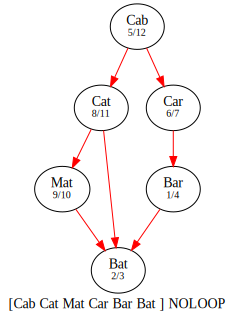

In [34]:
Source(read_dot_file("catdfs"))

/dot/7dfs.dot
digraph g {
label = "[0 3 1 2 4 5 6 ] NOLOOP"
0[label = <0<BR /><FONT POINT-SIZE='10'>1/14</FONT>>]
3[label = <3<BR /><FONT POINT-SIZE='10'>10/13</FONT>>]
1[label = <1<BR /><FONT POINT-SIZE='10'>11/12</FONT>>]
2[label = <2<BR /><FONT POINT-SIZE='10'>2/9</FONT>>]
4[label = <4<BR /><FONT POINT-SIZE='10'>7/8</FONT>>]
5[label = <5<BR /><FONT POINT-SIZE='10'>3/6</FONT>>]
6[label = <6<BR /><FONT POINT-SIZE='10'>4/5</FONT>>]
edge [color=red]
0 -> 2 [label = 5]
0 -> 3 [label = 3]
0 -> 1 [label = 14]
2 -> 5 [label = 2]
2 -> 4 [label = 3]
3 -> 2 [label = 11]
3 -> 4 [label = 7]
3 -> 1 [label = 6]
1 -> 6 [label = 6]
1 -> 4 [label = 7]
4 -> 6 [label = 5]
5 -> 6 [label = 7]
}



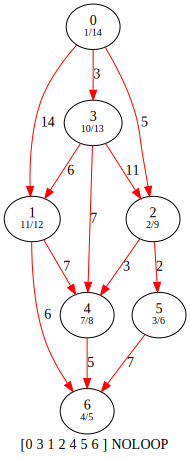

In [35]:
Source(read_dot_file("7dfs"))